<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(2_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.4_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,96.905893,27.272518,30.199591,-1.594208,162.783795,174.841012,-12.057218
1,0.0,1.0,22.377492,32.709164,26.616664,69.949865,161.653186,93.932285,67.720901
2,0.0,2.0,98.112411,37.436148,48.297779,16.779646,210.625982,205.094216,5.531767
3,0.0,3.0,39.638542,63.825785,48.703073,-414.256412,-252.089011,161.984697,-414.073708
4,0.0,4.0,99.295139,72.720767,73.747996,260.511257,516.275160,262.811683,253.463477
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,35.260831,87.859009,88.477557,-289.853867,-68.256470,192.347426,-260.603896
249996,999.0,246.0,96.974379,58.978352,56.117251,-129.849152,92.220830,246.769948,-154.549119
249997,999.0,247.0,35.934614,28.950670,67.742051,58.872679,201.500013,132.323050,69.176964
249998,999.0,248.0,78.990911,62.893437,91.266796,-113.644380,129.506764,261.353971,-131.847207


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    96.905893  27.272518  30.199591   -1.594208  162.783795   
      1.0    22.377492  32.709164  26.616664   69.949865  161.653186   
      2.0    98.112411  37.436148  48.297779   16.779646  210.625982   
      3.0    39.638542  63.825785  48.703073 -414.256412 -252.089011   
      4.0    99.295139  72.720767  73.747996  260.511257  516.275160   
...                ...        ...        ...         ...         ...   
999.0 245.0  35.260831  87.859009  88.477557 -289.853867  -68.256470   
      246.0  96.974379  58.978352  56.117251 -129.849152   92.220830   
      247.0  35.934614  28.950670  67.742051   58.872679  201.500013   
      248.0  78.990911  62.893437  91.266796 -113.644380  129.506764   
      249.0  28.763024  39.509997  80.402381  154.432824  313.108225   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    174.841012  -12.057218  
      1.0     93.932285   67.720901  
      2.0    205.094216    5.531767  
      3.0    161.984697 -414.073708  
      4.0    262.811683  253.463477  
...                 ...         ...  
999.0 245.0  192.347426 -260.603896  
      246.0  246.769948 -154.549119  
      247.0  132.323050   69.176964  
      248.0  261.353971 -131.847207  
      249.0  141.676168  171.432058  

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    96.905893  27.272518  30.199591   -1.594208  162.783795   
      1.0    22.377492  32.709164  26.616664   69.949865  161.653186   
      2.0    98.112411  37.436148  48.297779   16.779646  210.625982   
      3.0    39.638542  63.825785  48.703073 -414.256412 -252.089011   
      4.0    99.295139  72.720767  73.747996  260.511257  516.275160   
...                ...        ...        ...         ...         ...   
999.0 245.0  35.260831  87.859009  88.477557 -289.853867  -68.256470   
      246.0  96.974379  58.978352  56.117251 -129.849152   92.220830   
      247.0  35.934614  28.950670  67.742051   58.872679  201.500013   
      248.0  78.990911  62.893437  91.266796 -113.644380  129.506764   
      249.0  28.763024  39.509997  80.402381  154.432824  313.108225   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    174.841012  -12.057218  
      1.0     93.932285   67.720901  
      2.0    205.094216    5.531767  
      3.0    161.984697 -414.073708  
      4.0    262.811683  253.463477  
...                 ...         ...  
999.0 245.0  192.347426 -260.603896  
      246.0  246.769948 -154.549119  
      247.0  132.323050   69.176964  
      248.0  261.353971 -131.847207  
      249.0  141.676168  171.432058  

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,96.905893,27.272518,30.199591,-1.594208,162.783795,174.841012,-12.057218
1,0.0,1.0,22.377492,32.709164,26.616664,69.949865,161.653186,93.932285,67.720901
2,0.0,2.0,98.112411,37.436148,48.297779,16.779646,210.625982,205.094216,5.531767
3,0.0,3.0,39.638542,63.825785,48.703073,-414.256412,-252.089011,161.984697,-414.073708
4,0.0,4.0,99.295139,72.720767,73.747996,260.511257,516.275160,262.811683,253.463477
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,35.260831,87.859009,88.477557,-289.853867,-68.256470,192.347426,-260.603896
249996,999.0,246.0,96.974379,58.978352,56.117251,-129.849152,92.220830,246.769948,-154.549119
249997,999.0,247.0,35.934614,28.950670,67.742051,58.872679,201.500013,132.323050,69.176964
249998,999.0,248.0,78.990911,62.893437,91.266796,-113.644380,129.506764,261.353971,-131.847207


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    96.905893  27.272518  30.199591   -1.594208  162.783795   
      1.0    22.377492  32.709164  26.616664   69.949865  161.653186   
      2.0    98.112411  37.436148  48.297779   16.779646  210.625982   
      3.0    39.638542  63.825785  48.703073 -414.256412 -252.089011   
      4.0    99.295139  72.720767  73.747996  260.511257  516.275160   
...                ...        ...        ...         ...         ...   
999.0 245.0  35.260831  87.859009  88.477557 -289.853867  -68.256470   
      246.0  96.974379  58.978352  56.117251 -129.849152   92.220830   
      247.0  35.934614  28.950670  67.742051   58.872679  201.500013   
      248.0  78.990911  62.893437  91.266796 -113.644380  129.506764   
      249.0  28.763024  39.509997  80.402381  154.432824  313.108225   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    174.841012  -12.057218  
      1.0     93.932285   67.720901  
      2.0    205.094216    5.531767  
      3.0    161.984697 -414.073708  
      4.0    262.811683  253.463477  
...                 ...         ...  
999.0 245.0  192.347426 -260.603896  
      246.0  246.769948 -154.549119  
      247.0  132.323050   69.176964  
      248.0  261.353971 -131.847207  
      249.0  141.676168  171.432058  

[250000 rows x 7 columns]

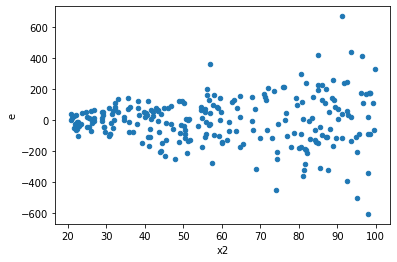

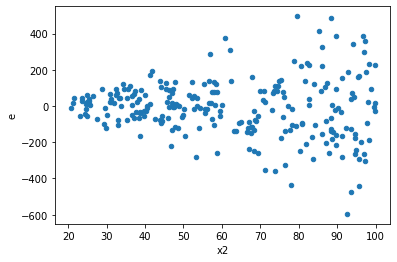

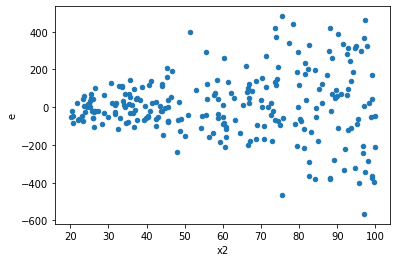

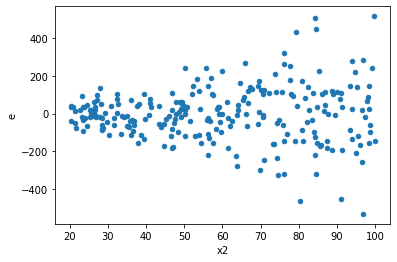

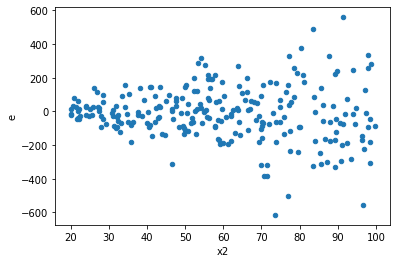

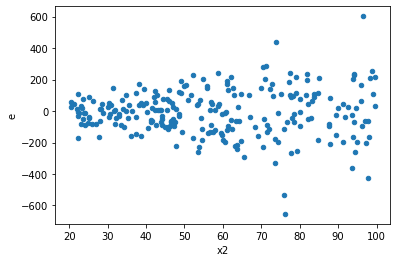

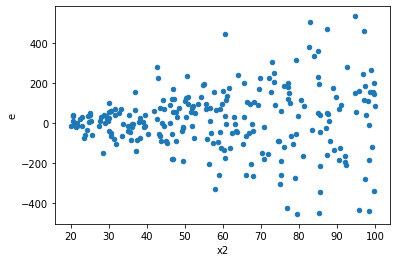

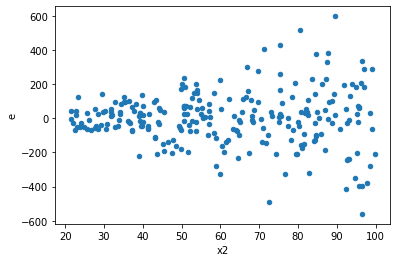

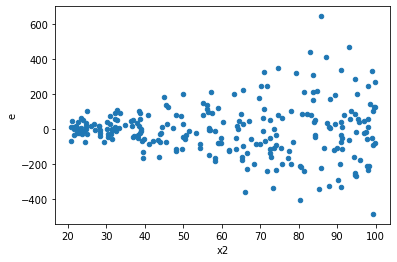

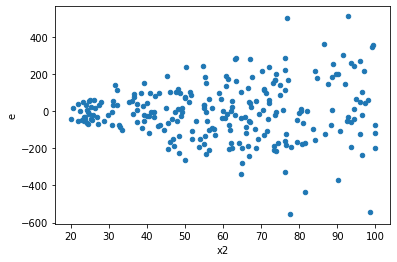

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,117.0,127.0,1418675.6971176672,5091613.830174948,12125.43330869801,40091.44748169251,3.3063929726068815,1.079951683635727e-10,0.9999999999460024,5.399758418178635e-11,Reject005=0 : Heteroscedasticity
1.0,135.0,109.0,2407681.319867817,2454294.9520314177,17834.676443465312,22516.46744982952,1.2625105659306555,0.20614106658386633,0.8969294667080668,0.10307053329193316,Reject005=1 : Homoscedasticity
2.0,124.0,120.0,1593512.8253864204,4369880.094748045,12850.909882148551,36415.667456233714,2.8337034334681177,2.1224832780220027e-08,0.9999999893875836,1.0612416390110013e-08,Reject005=0 : Heteroscedasticity
3.0,149.0,95.0,2717100.5691107316,2653225.917416267,18235.57428933377,27928.693867539652,1.5315500035485867,0.025470262677536937,0.9872648686612315,0.012735131338768468,Reject005=0 : Heteroscedasticity
6.0,111.0,133.0,1905672.550996768,3787437.9025109685,17168.221180151064,28476.976710608786,1.6587028097897685,0.005280133531314624,0.9973599332343427,0.002640066765657312,Reject005=0 : Heteroscedasticity
10.0,135.0,109.0,1196811.5022354152,4639418.312823533,8865.270386929002,42563.470759848926,4.801147500543776,1.1102230246251565e-15,0.9999999999999994,5.551115123125783e-16,Reject005=0 : Heteroscedasticity
12.0,121.0,123.0,1113852.0371114365,6063605.895177456,9205.388736458153,49297.60890388175,5.355298979242174,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
16.0,119.0,125.0,2993403.1696227826,3352572.4203411783,25154.648484225065,26820.579362729426,1.0662275554973109,0.7226879814042113,0.6386560092978943,0.36134399070210566,Reject005=1 : Homoscedasticity
18.0,115.0,129.0,667636.2629339877,4785095.56618074,5805.53272116511,37093.76407892046,6.389381622755909,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,117.0,127.0,1418675.6971176672,5091613.830174948,12125.43330869801,40091.44748169251,3.3063929726068815,1.079951683635727e-10,Reject005=0 : Heteroscedasticity
1.0,135.0,109.0,2407681.319867817,2454294.9520314177,17834.676443465312,22516.46744982952,1.2625105659306555,0.20614106658386633,Reject005=1 : Homoscedasticity
2.0,124.0,120.0,1593512.8253864204,4369880.094748045,12850.909882148551,36415.667456233714,2.8337034334681177,2.1224832780220027e-08,Reject005=0 : Heteroscedasticity
3.0,149.0,95.0,2717100.5691107316,2653225.917416267,18235.57428933377,27928.693867539652,1.5315500035485867,0.025470262677536937,Reject005=0 : Heteroscedasticity
4.0,129.0,115.0,3928049.456686283,2757520.3929173825,30449.995788265758,23978.438199281587,0.7874693437074938,0.18697472337215287,Reject005=1 : Homoscedasticity
5.0,131.0,113.0,3783352.4458907214,1640037.484992896,28880.553022066575,14513.606061884035,0.5025390632511337,0.00015594898326392722,Reject005=0 : Heteroscedasticity
6.0,111.0,133.0,1905672.550996768,3787437.9025109685,17168.221180151064,28476.976710608786,1.6587028097897685,0.005280133531314624,Reject005=0 : Heteroscedasticity
7.0,127.0,117.0,4046693.7146643028,1742271.3158478835,31863.730036726793,14891.207827759688,0.4673403838971701,3.132596960211296e-05,Reject005=0 : Heteroscedasticity
8.0,136.0,108.0,4184571.38784969,2722998.208614527,30768.90726360066,25212.946376060434,0.8194293726474687,0.27108893516256133,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    518
Reject005=1 : Homoscedasticity      482
Name: Result_test, dtype: int64